In [1]:
import pickle
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns

### **STRUCTURE**

loss_means,

 loss_stds,

dev_acc_means, 

dev_acc_stds,

test_acc_mean, 

test_acc_std, 

short_long_means, 

short_long_stds, 

foursplits_means,
    
foursplits_stds,

##### **Reader**

In [6]:
with open('./results/ex1/BOW_results1.pkl', 'rb') as f:
  bow_results = pickle.load(f)

with open('./results/ex1/CBOW_results1.pkl', 'rb') as f:
  cbow_results = pickle.load(f)

with open('./results/ex1/DeepCBOW_results1.pkl', 'rb') as f:
  deep_cbow_results = pickle.load(f)

with open('./results/ex1/PTDeepCBOW_GLOVE_results1.pkl', 'rb') as f:
  pt_deep_cbow_results = pickle.load(f)

#with open('./results/PTDeepCBOW_WORD2VEC_results1.pkl', 'rb') as f:
#  pt_deep_cbow_word2vec_results = pickle.load(f)

#with open('/Users/joanvelja/Desktop/UvA AI/Natural Language Processing 1/FINAL REPORT 2/results/PTDeepCBOW_WORD2VEC_FINETUNED_EMBEDDINGS_results1.pkl', 'rb') as f:
#  pt_deep_cbow_word2vec_finetuned_embeddings_results = pickle.load(f)

#with open('/Users/joanvelja/Desktop/UvA AI/Natural Language Processing 1/FINAL REPORT 2/results/PTDeepCBOW_GLOVE_FINETUNED_results1.pkl', 'rb') as f:
#  pt_deep_cbow_GloVe_finetuned_results = pickle.load(f)

##### **LSTM Reader**

In [8]:
# LSTM Results

with open('/Users/joanvelja/Desktop/UvA AI/Natural Language Processing 1/FINAL REPORT 2/results/ex1/LSTM_GLOVE_results1.pkl', 'rb') as f:
    lstm_results = pickle.load(f)

with open('/Users/joanvelja/Desktop/UvA AI/Natural Language Processing 1/FINAL REPORT 2/results/ex1/TreeLSTM_GLOVE_results1.pkl', 'rb') as f:
    tree_lstm_results = pickle.load(f)

with open('/Users/joanvelja/Desktop/UvA AI/Natural Language Processing 1/FINAL REPORT 2/results/ex1/ChildSum_GloVe_results1.pkl', 'rb') as f:
    child_sum_results = pickle.load(f)

#with open('/Users/joanvelja/Desktop/UvA AI/Natural Language Processing 1/FINAL REPORT 2/results/LSTM_W2V_results1.pkl', 'rb') as f:
#    lstm_word2vec_results = pickle.load(f)

#with open('/Users/joanvelja/Desktop/UvA AI/Natural Language Processing 1/FINAL REPORT 2/results/TreeLSTM_W2V_results1.pkl', 'rb') as f:
#    tree_lstm_word2vec_results = pickle.load(f)

#with open('/Users/joanvelja/Desktop/UvA AI/Natural Language Processing 1/FINAL REPORT 2/results/TreeLSTM_W2V_results1.pkl', 'rb') as f:
#    tree_lstm_word2vec_results = pickle.load(f)

#with open('/Users/joanvelja/Desktop/UvA AI/Natural Language Processing 1/FINAL REPORT 2/results/ChildSum_W2V_results1.pkl', 'rb') as f:
#    child_sum_word2vec_results = pickle.load(f)


#with open('./results_v2/LSTM_word2vec_results.pkl', 'rb') as f:
#    lstm_word2vec_results = pickle.load(f)

##### **Extracting metrics**

In [9]:
results = [bow_results, cbow_results, deep_cbow_results, pt_deep_cbow_results, lstm_results, tree_lstm_results, child_sum_results]
models = ['BOW', 'CBOW', 'DeepCBOW', 'PTDeepCBOW', 'LSTM', 'TreeLSTM', 'ChildSum']

print(len(results), len(models))

""" loss_means,

 loss_stds,

dev_acc_means, 

dev_acc_stds,

test_acc_mean, 

test_acc_std, 

short_long_means, 

short_long_stds, 

foursplits_means,
    
foursplits_stds """

losses = {}
loss_stds = {}
dev_accs = {}
dev_acc_stds = {}
test_accs = {}
test_acc_stds = {}
short_long_means = {}
short_long_stds = {}
foursplits_means = {}
foursplits_stds = {}



for model, result in zip(models, results):
  print(model)
  losses[model] = result[0]
  loss_stds[model] = result[1]
  dev_accs[model] = result[2]
  dev_acc_stds[model] = result[3]
  test_accs[model] = result[4]
  test_acc_stds[model] = result[5]
  short_long_means[model] = result[6]
  short_long_stds[model] = result[7]
  foursplits_means[model] = result[8]
  foursplits_stds[model] = result[9]

7 7
BOW
CBOW
DeepCBOW
PTDeepCBOW
LSTM
TreeLSTM
ChildSum


In [10]:
import numpy as np

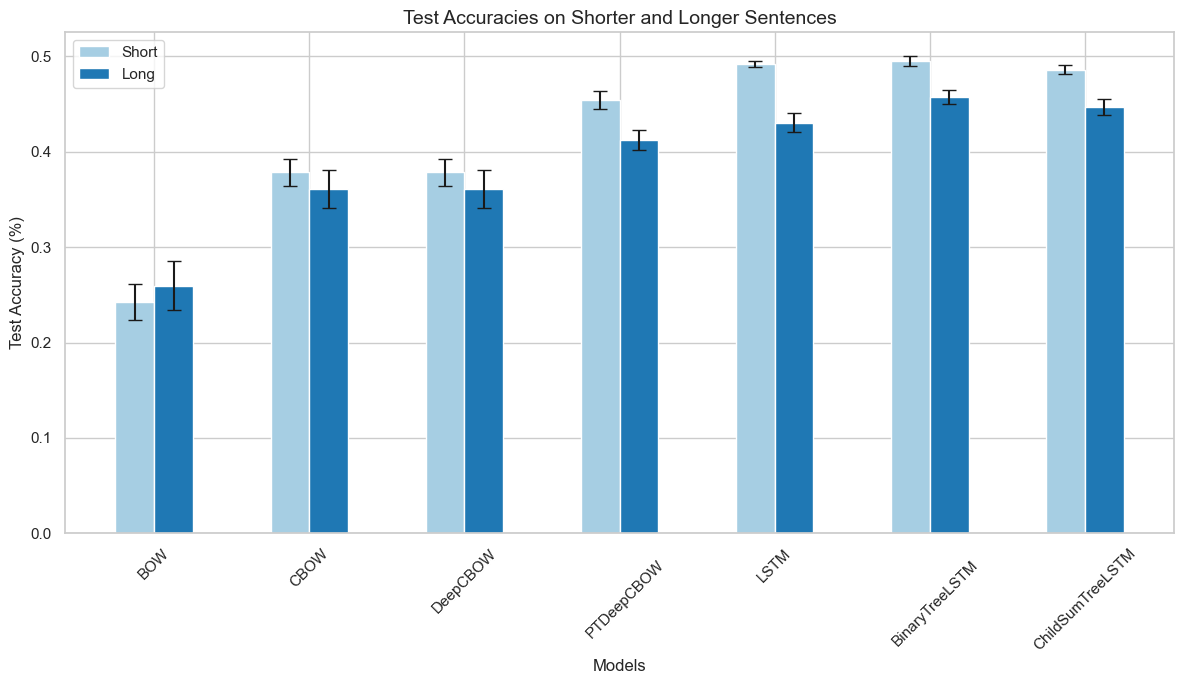

In [19]:
width = 0.25
model_names = ['BOW', 'CBOW', 'DeepCBOW', '\nPTDeepCBOW', 'LSTM', '\nBinaryTreeLSTM', 'ChildSumTreeLSTM']
x1 = np.arange(len(model_names))
x2 = [x + width for x in x1]

ys = [bow_results[6], cbow_results[6], deep_cbow_results[6], pt_deep_cbow_results[6],
      lstm_results[6], tree_lstm_results[6], child_sum_results[6]]
y1 = [y[0] for y in ys]
y2 = [y[1] for y in ys]

y_stds = [bow_results[7], cbow_results[7], deep_cbow_results[7], pt_deep_cbow_results[7],
          lstm_results[7], tree_lstm_results[7], child_sum_results[7]]
y1_stds = [y[0] for y in y_stds]
y2_stds = [y[1] for y in y_stds]


sns.set(style="whitegrid")

# Palette
palette = sns.color_palette("Paired")

# Creating the plot
plt.figure(figsize=(12, 7))  # Adjusted size
bars1 = plt.bar(x1, y1, width, yerr=y1_stds, label='Short', color=palette[0], capsize=5)
bars2 = plt.bar(x2, y2, width, yerr=y2_stds, label='Long', color=palette[1], capsize=5)

# Adding data labels above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        #plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', 
                 #ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

# Setting x-ticks and labels
plt.xticks([r + width / 2 for r in range(len(x1))], model_names, rotation=45)  # Rotate for better readability

plt.ylabel('Test Accuracy (%)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.title('Test Accuracies on Shorter and Longer Sentences', fontsize=14)
plt.legend(loc='upper left')

# Adjust layout
plt.tight_layout()

plt.show()

#### **Legend**
- **loss_means**: mean of the loss of the 5 runs

- **loss_stds**: std of the loss of the 5 runs


- **dev_acc_means**: mean of the dev accuracy of the 5 runs
- **dev_acc_stds**: std of the dev accuracy of the 5 runs
- **test_acc_mean**: mean of the test accuracy of the 5 runs
- **test_acc_std**: std of the test accuracy of the 5 runs
- **short_long_means**: mean of the short/long accuracy of the 5 runs **2 values**
- **short_long_stds**: std of the short/long accuracy of the 5 runs **2 values**
- **foursplits_means**: mean of the 4 splits accuracy of the 5 runs **4 values**
- **foursplits_stds**: std of the 4 splits accuracy of the 5 runs **4 values**


In [60]:
foursplits_means

{'BOW': array([0.25277778, 0.25023585, 0.26103704, 0.23513514]),
 'CBOW': array([0.36898148, 0.35      , 0.33866667, 0.30990991]),
 'DeepCBOW': array([0.38935185, 0.37193396, 0.36474074, 0.34144144]),
 'PTDeepCBOW_GloVe': array([0.47037037, 0.44599057, 0.40296296, 0.40810811]),
 'PTDeepCBOW_word2vec': array([0.45092593, 0.44033019, 0.39022222, 0.3963964 ]),
 'PTDeepCBOW_W2V_F': array([0.4787037 , 0.45613208, 0.41096296, 0.39369369]),
 'PTDeepCBOW_Glo_F': array([0.47685185, 0.45424528, 0.42785185, 0.4       ])}

In [ ]:
test_acc_stds

In [83]:
lstm_results = [lstm_GloVe_results, tree_lstm_GloVe_results, lstm_word2vec_results, tree_lstm_word2vec_results, child_sum_GloVe_results, child_sum_word2vec_results]
lstm_models = ['LSTM_GloVe', 'TreeLSTM_GloVe', 'LSTM_word2vec', 'TreeLSTM_word2vec', 'ChildSum_GloVe', 'ChildSum_word2vec']

lstm_losses = {}
lstm_loss_stds = {}
lstm_dev_accs = {}
lstm_dev_acc_stds = {}
lstm_test_accs = {}
lstm_test_acc_stds = {}
lstm_short_long_means = {}
lstm_short_long_stds = {}
lstm_foursplits_means = {}
lstm_foursplits_stds = {}

for model, result in zip(lstm_models, lstm_results):
  lstm_losses[model] = result[0]
  lstm_loss_stds[model] = result[1]
  lstm_dev_accs[model] = result[2]
  lstm_dev_acc_stds[model] = result[3]
  lstm_test_accs[model] = result[4]
  lstm_test_acc_stds[model] = result[5]
  lstm_short_long_means[model] = result[6]
  lstm_short_long_stds[model] = result[7]
  lstm_foursplits_means[model] = result[8]
  lstm_foursplits_stds[model] = result[9]

In [84]:
lstm_test_accs

{'LSTM_GloVe': 0.46126696832579184,
 'TreeLSTM_GloVe': 0.4761990950226244,
 'LSTM_word2vec': 0.44253393665158375,
 'TreeLSTM_word2vec': 0.4618099547511313,
 'ChildSum_GloVe': 0.466606334841629,
 'ChildSum_word2vec': 0.43864253393665165}

In [85]:
lstm_test_acc_stds

{'LSTM_GloVe': 0.004512199407173908,
 'TreeLSTM_GloVe': 0.004250504458214443,
 'LSTM_word2vec': 0.008871548186897706,
 'TreeLSTM_word2vec': 0.006990034938399101,
 'ChildSum_GloVe': 0.006330961966476988,
 'ChildSum_word2vec': 0.008267551562393661}

# **RESULTS**

#### **Training Losses**

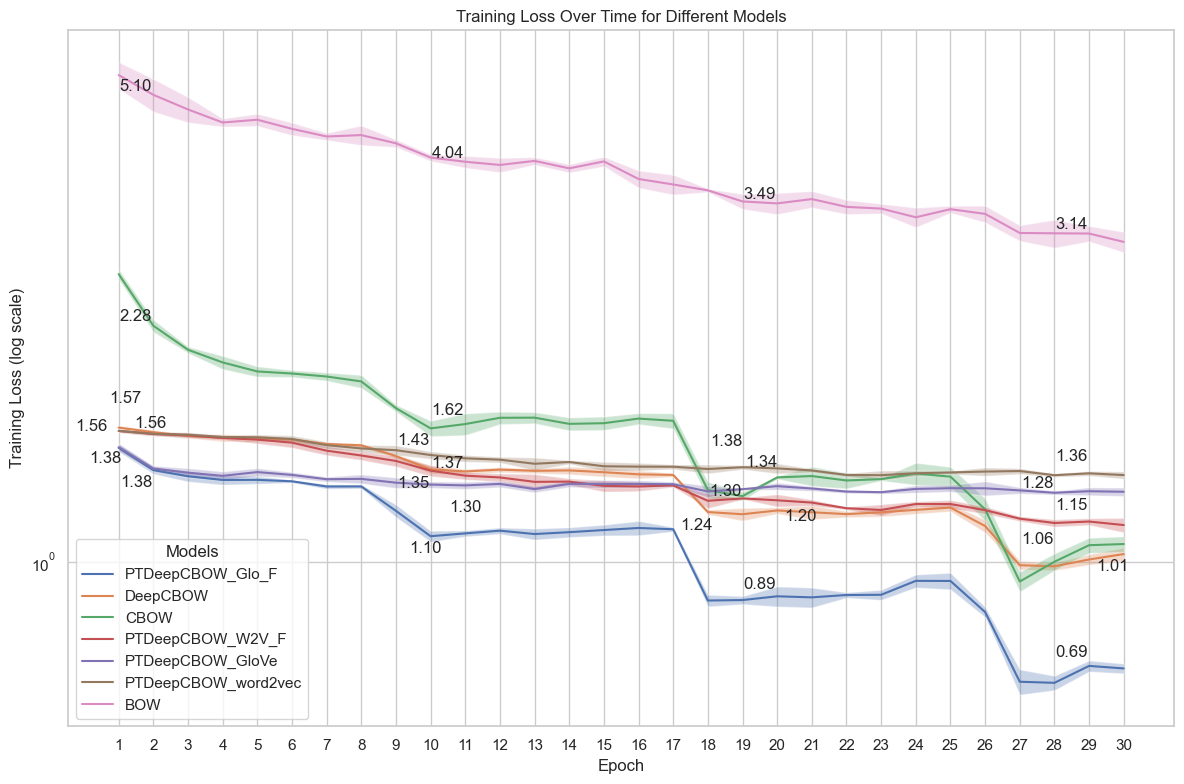

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import numpy as np

# Assuming 'losses' and 'loss_stds' dictionaries are defined as provided.

# Sort the models based on the final loss value
sorted_models = sorted(losses.keys(), key=lambda x: losses[x][-1])

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

annotations = []

for label in sorted_models:
    data = losses[label]
    epochs = range(1, len(data) + 1)
    std_dev = loss_stds[label]

    # Plotting the mean loss and the standard deviation as a shaded area
    plt.plot(epochs, data, label=label)
    plt.fill_between(epochs, data - std_dev, data + std_dev, alpha=0.3)

    # Adding annotations for every 5th epoch
    for i in range(1, len(data), 9):
        annotation = plt.annotate(f'{data[i]:.2f}', (i, data[i]), ha='center')
        annotations.append(annotation)

# Dynamically adjust the position of the annotations
adjust_text(annotations)

# Enhancing readability and user experience
plt.xlabel('Epoch')
plt.ylabel('Training Loss (log scale)')
plt.yscale('log')  # Setting y-axis to logarithmic scale for better visualization of loss
plt.title('Training Loss Over Time for Different Models')
plt.legend(title='Models', loc='best')

# Setting x-ticks for better clarity
plt.xticks(range(1, len(losses[next(iter(losses))]) + 1, 1))

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

### **LSTM Losses**

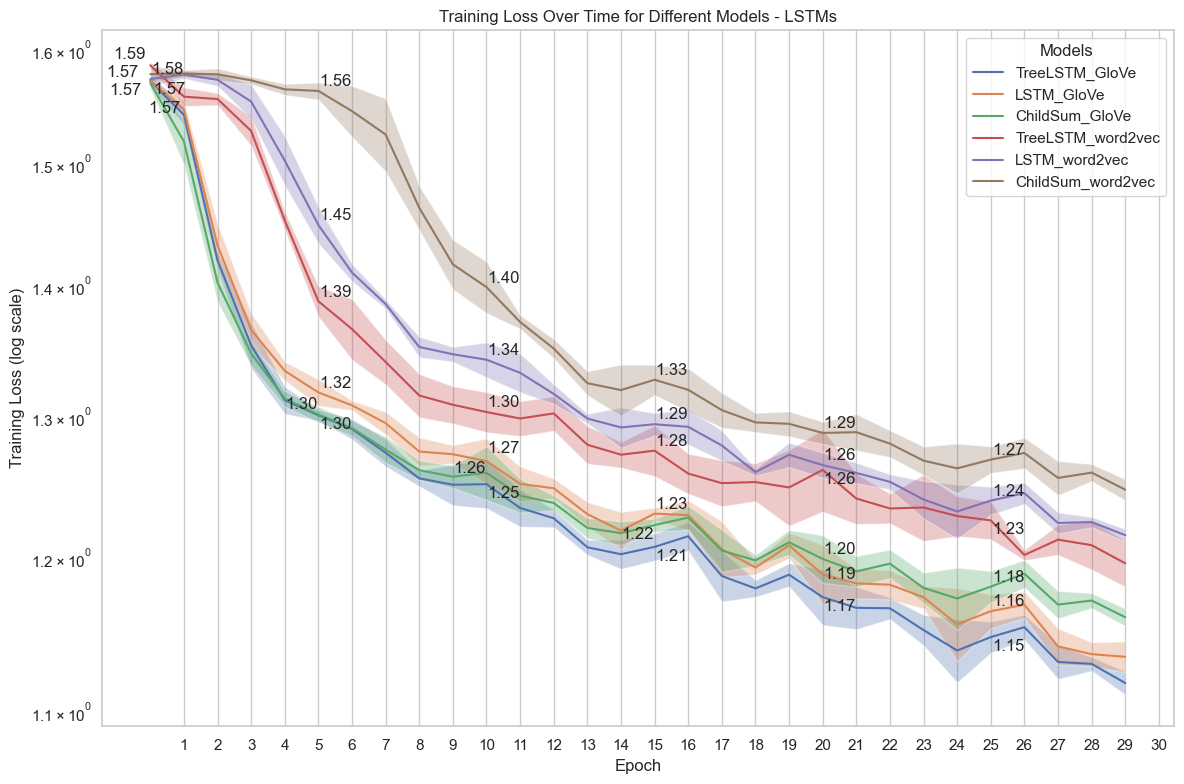

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Assuming 'lstm_losses' and 'lstm_loss_stds' are dictionaries containing your data.

# Sort the models based on the final loss value
sorted_lstm_models = sorted(lstm_losses.keys(), key=lambda x: lstm_losses[x][-1])

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

annotations = []
for label in sorted_lstm_models:
    data = lstm_losses[label]
    epochs = range(len(data))
    std_dev = lstm_loss_stds[label]

    # Plotting the mean loss and the standard deviation as a shaded area
    plt.plot(epochs, data, label=label)
    plt.fill_between(epochs, data - std_dev, data + std_dev, alpha=0.3)

    # Adding annotations for every 5th epoch
    for i in range(0, len(data), 5):
        annotation = plt.annotate(f'{data[i]:.2f}', (i, data[i]), ha='center')
        annotations.append(annotation)

# Dynamically adjust the position of the annotations
adjust_text(annotations)

plt.xlabel('Epoch')
plt.ylabel('Training Loss (log scale)')
plt.yscale('log')  # Setting y-axis to logarithmic scale for better visualization of loss
plt.title('Training Loss Over Time for Different Models - LSTMs')
plt.legend(title='Models')

plt.xticks(range(0, len(lstm_losses[next(iter(lstm_losses))]), 2))

plt.tight_layout()
plt.show()


### **Dev Accuracy**

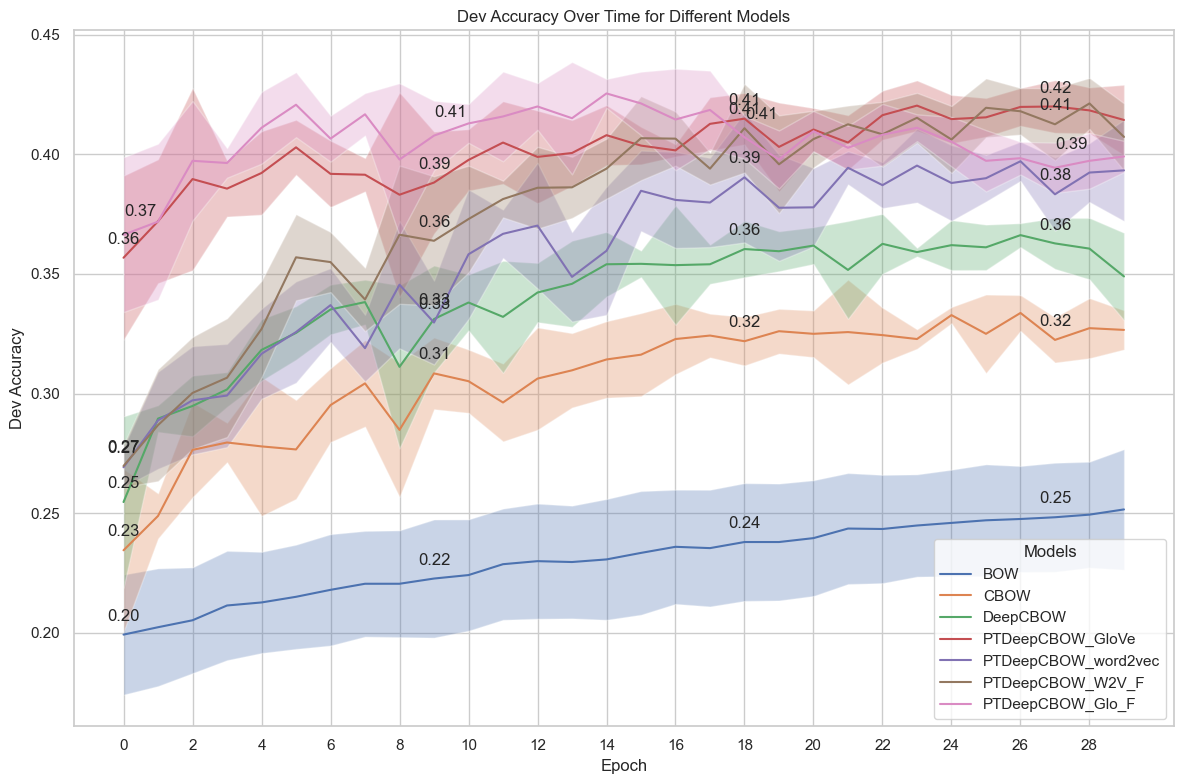

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dev_accs', 'dev_acc_stds', and possibly 'losses' variables are already defined.

plt.figure(figsize=(12, 8))

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

for label, data in dev_accs.items():
    epochs = range(len(data))
    std_dev = dev_acc_stds[label]

    # Plotting the mean accuracy
    plt.plot(epochs, data, label=label)

    # Adding the standard deviation as a shaded area
    plt.fill_between(epochs, data - std_dev, data + std_dev, alpha=0.3)

    # Adding annotations for every 5th epoch
    annotations = [plt.annotate(f'{data[i]:.2f}', (i, data[i]), textcoords="offset points", xytext=(0,10), ha='center') for i in range(0, len(data), 9)]

# Use adjust_text to dynamically adjust the position of the annotations, if the function is available
if 'adjust_text' in globals():
    adjust_text(annotations)

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Dev Accuracy')
plt.title('Dev Accuracy Over Time for Different Models')

# Setting x-ticks to show labels for every 2nd epoch for clarity
plt.xticks(range(0, len(dev_accs[next(iter(dev_accs))]), 2))

# Adding a legend
plt.legend(title='Models')

# Adjusting layout to ensure everything fits without overlapping
plt.tight_layout()

plt.show()

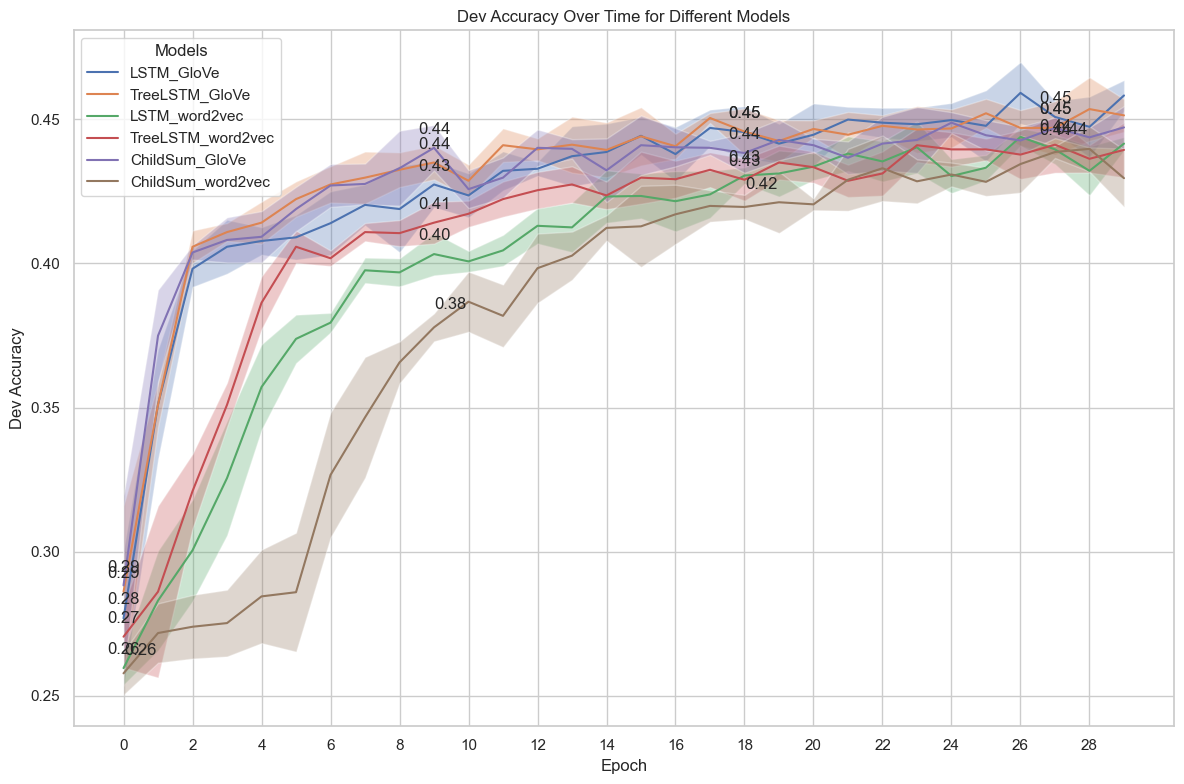

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dev_accs', 'dev_acc_stds', and possibly 'losses' variables are already defined.

plt.figure(figsize=(12, 8))

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

for label, data in lstm_dev_accs.items():
    epochs = range(len(data))
    std_dev = lstm_dev_acc_stds[label]

    # Plotting the mean accuracy
    plt.plot(epochs, data, label=label)

    # Adding the standard deviation as a shaded area
    plt.fill_between(epochs, data - std_dev, data + std_dev, alpha=0.3)

    # Adding annotations for every 5th epoch
    annotations = [plt.annotate(f'{data[i]:.2f}', (i, data[i]), textcoords="offset points", xytext=(0,10), ha='center') for i in range(0, len(data), 9)]

# Use adjust_text to dynamically adjust the position of the annotations, if the function is available
if 'adjust_text' in globals():
    adjust_text(annotations)

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Dev Accuracy')
plt.title('Dev Accuracy Over Time for Different Models')

# Setting x-ticks to show labels for every 2nd epoch for clarity
plt.xticks(range(0, len(lstm_dev_accs[next(iter(lstm_dev_accs))]), 2))

# Adding a legend
plt.legend(title='Models')

# Adjusting layout to ensure everything fits without overlapping
plt.tight_layout()

plt.show()

In [43]:
errors

[0.015385680027043196,
 0.01782001334617196,
 0.014483596743908566,
 0.005100091512617329,
 0.004012633353374712,
 0.011549014781768884,
 0.007243211874665601]

/var/folders/h1/jx9cxfmn6yxbsb49_0l97pk40000gn/T/ipykernel_9524/1718159320.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_accuracies_array, y=sorted_models, palette=palette, capsize=0.1)
/var/folders/h1/jx9cxfmn6yxbsb49_0l97pk40000gn/T/ipykernel_9524/1718159320.py:29: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x=sorted_accuracies_array, y=sorted_models, palette=palette, capsize=0.1)


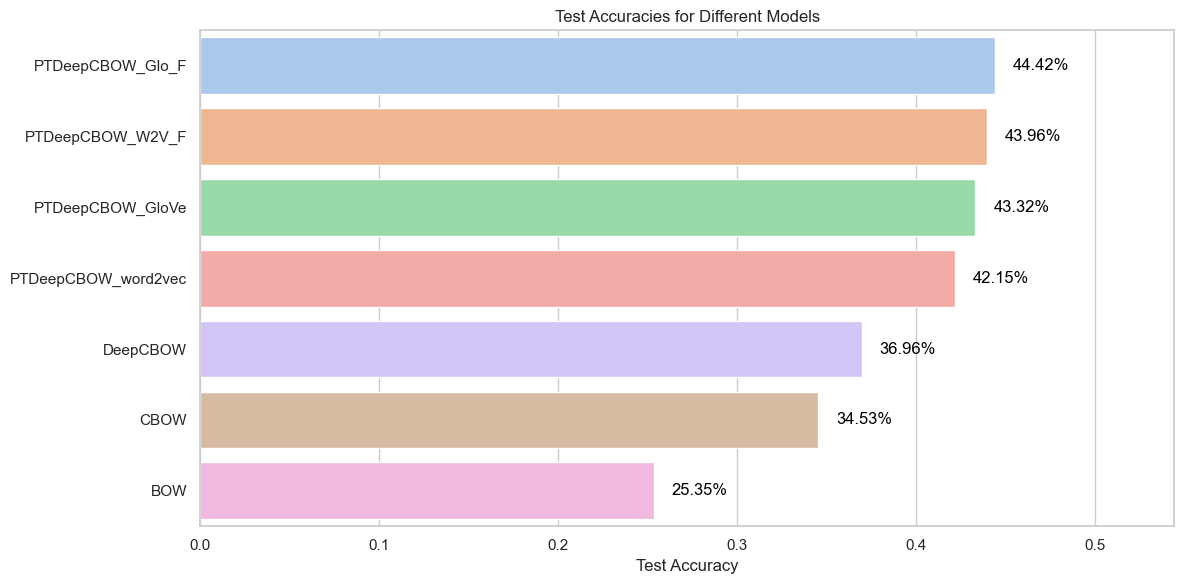

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the 'models', 'test_accs', and possibly 'test_acc_stds' variables are already defined.

accuracies = [test_accs[model] for model in models]
errors = [test_acc_stds[model] for model in models]

sorted_indices = sorted(range(len(accuracies)), key=lambda i: accuracies[i], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]
sorted_errors = [errors[i] for i in sorted_indices]

sorted_accuracies_array = np.array(sorted_accuracies)
sorted_errors_array = np.array(sorted_errors)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a color palette
palette = sns.color_palette("pastel")

# Create the figure
plt.figure(figsize=(12, 6))

# Create a barplot using Seaborn, which automatically adds error bars if provided
# If you have error data, uncomment the 'yerr' parameter and pass 'sorted_errors'
sns.barplot(x=sorted_accuracies_array, y=sorted_models, palette=palette, capsize=0.1)

# Adjusting the position of accuracy labels to avoid overlap
for index, value in enumerate(sorted_accuracies):
    plt.text(value + 0.01, index, f'{value * 100:.2f}%', va='center', color='black')

plt.xlabel('Test Accuracy')
plt.title('Test Accuracies for Different Models')
plt.xlim(0, max(sorted_accuracies) + 0.1)  # Adjust x-limits to fit the text

plt.tight_layout()
plt.show()

/var/folders/h1/jx9cxfmn6yxbsb49_0l97pk40000gn/T/ipykernel_9524/1399052348.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_accuracies_array, y=sorted_models, palette=palette, capsize=0.1)
/var/folders/h1/jx9cxfmn6yxbsb49_0l97pk40000gn/T/ipykernel_9524/1399052348.py:29: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(x=sorted_accuracies_array, y=sorted_models, palette=palette, capsize=0.1)


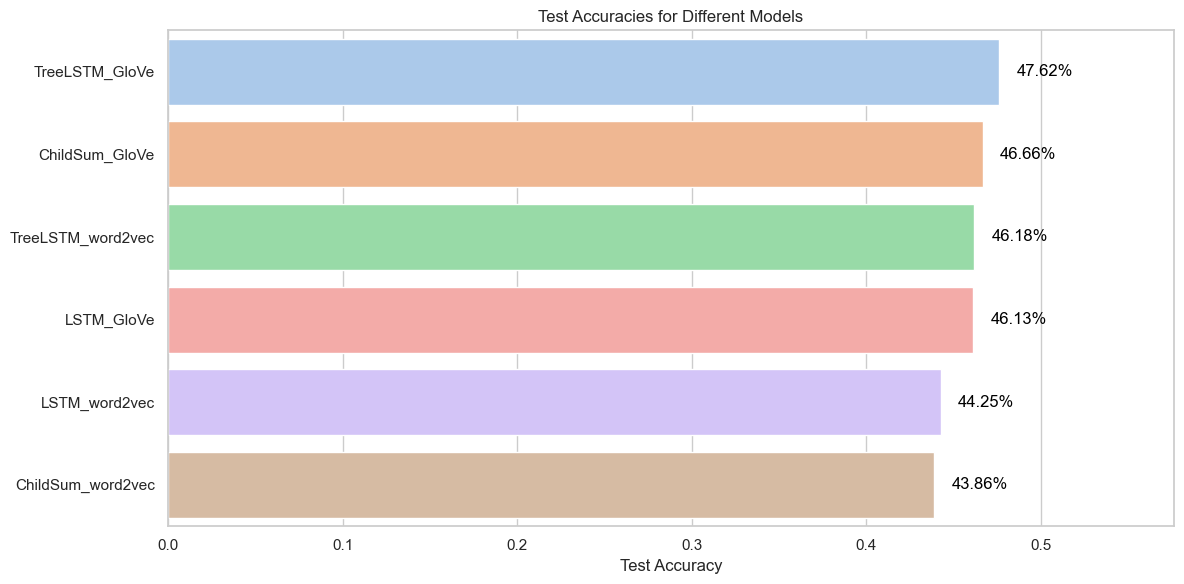

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the 'models', 'test_accs', and possibly 'test_acc_stds' variables are already defined.

accuracies = [lstm_test_accs[model] for model in lstm_models]
errors = [lstm_test_acc_stds[model] for model in lstm_models]

sorted_indices = sorted(range(len(accuracies)), key=lambda i: accuracies[i], reverse=True)
sorted_models = [lstm_models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]
sorted_errors = [errors[i] for i in sorted_indices]

sorted_accuracies_array = np.array(sorted_accuracies)
sorted_errors_array = np.array(sorted_errors)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a color palette
palette = sns.color_palette("pastel")

# Create the figure
plt.figure(figsize=(12, 6))

# Create a barplot using Seaborn, which automatically adds error bars if provided
# If you have error data, uncomment the 'yerr' parameter and pass 'sorted_errors'
sns.barplot(x=sorted_accuracies_array, y=sorted_models, palette=palette, capsize=0.1)

# Adjusting the position of accuracy labels to avoid overlap
for index, value in enumerate(sorted_accuracies):
    plt.text(value + 0.01, index, f'{value * 100:.2f}%', va='center', color='black')

plt.xlabel('Test Accuracy')
plt.title('Test Accuracies for Different Models')
plt.xlim(0, max(sorted_accuracies) + 0.1)  # Adjust x-limits to fit the text

plt.tight_layout()
plt.show()

### **Foursplits**

In [100]:
import matplotlib.pyplot as plt
import numpy as np

splits = {
    'BOW': np.array([0.25277778, 0.25023585, 0.26103704, 0.23513514]),
    'CBOW': np.array([0.36898148, 0.35, 0.33866667, 0.30990991]),
    'DeepCBOW': np.array([0.38935185, 0.37193396, 0.36474074, 0.34144144]),
    'PTDeepCBOW_GloVe': np.array([0.47037037, 0.44599057, 0.40296296, 0.40810811]),
    'PTDeepCBOW_word2vec': np.array([0.45092593, 0.44033019, 0.39022222, 0.3963964]),
    'PTDeepCBOW_W2V_F': np.array([0.4787037, 0.45613208, 0.41096296, 0.39369369]),
    'PTDeepCBOW_Glo_F': np.array([0.47685185, 0.45424528, 0.42785185, 0.4])
}

length_categories = ['Length = 0-10', 'Length = 11-20', 'Length = 21-30', 'Length = 30+']

# Number of categories
n_categories = len(length_categories)

# Setting the positions and width for the bars
bar_width = 0.10  # Adjusted for the number of models
positions = np.arange(n_categories)

# Creating the bar plot
plt.figure(figsize=(12, 6))

plt.bar(positions - 3*bar_width, splits['BOW'], bar_width, label='BOW')
plt.bar(positions - 2*bar_width, splits['CBOW'], bar_width, label='CBOW')
plt.bar(positions - bar_width, splits['DeepCBOW'], bar_width, label='DeepCBOW')
plt.bar(positions, splits['PTDeepCBOW_GloVe'], bar_width, label='PTDeepCBOW_GloVe')
plt.bar(positions + bar_width, splits['PTDeepCBOW_word2vec'], bar_width, label='PTDeepCBOW_word2vec')
plt.bar(positions + 2*bar_width, splits['PTDeepCBOW_W2V_F'], bar_width, label='PTDeepCBOW_W2V_F')
plt.bar(positions + 3*bar_width, splits['PTDeepCBOW_Glo_F'], bar_width, label='PTDeepCBOW_Glo_F')

# Adding labels and title
plt.xlabel('Sentence Length Category')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies Across Different Models and Sentence Lengths')
plt.xticks(positions, length_categories)
plt.legend(title='Models', fontsize='x-small', n-col=3

# Showing the plot
plt.show()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2445654904.py, line 39)

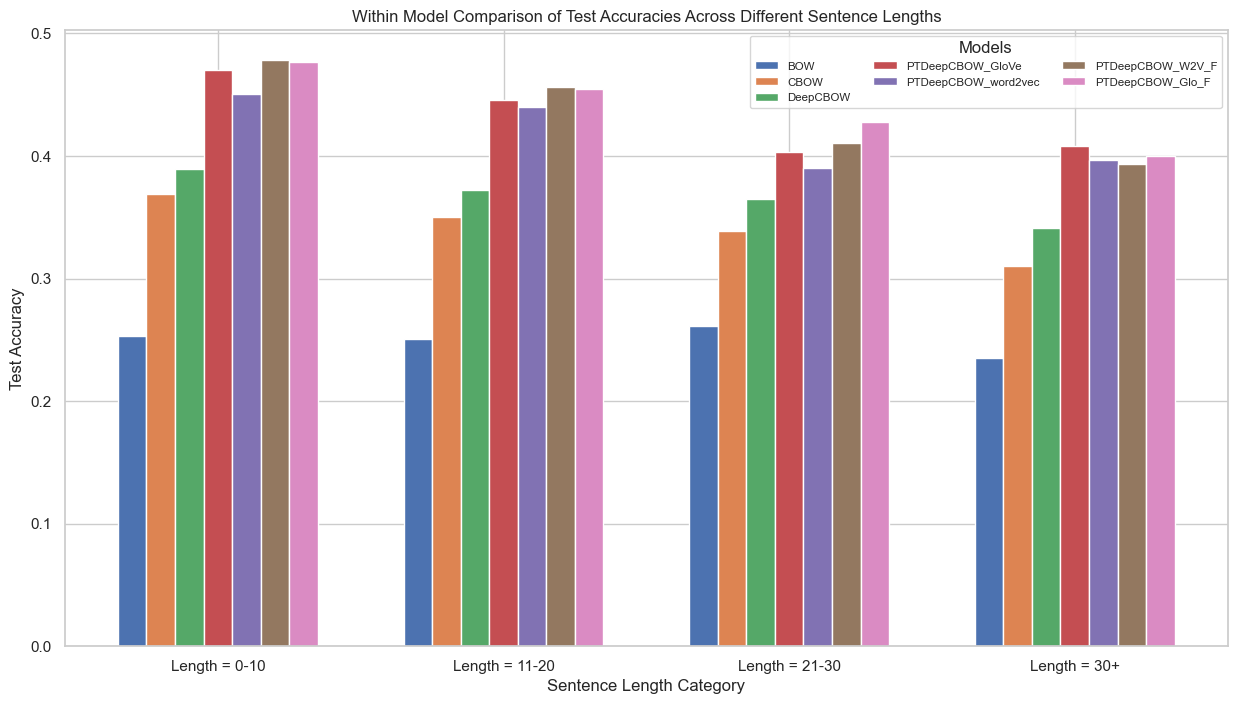

In [68]:
import matplotlib.pyplot as plt
import numpy as np

splits = {
    'BOW': np.array([0.25277778, 0.25023585, 0.26103704, 0.23513514]),
    'CBOW': np.array([0.36898148, 0.35, 0.33866667, 0.30990991]),
    'DeepCBOW': np.array([0.38935185, 0.37193396, 0.36474074, 0.34144144]),
    'PTDeepCBOW_GloVe': np.array([0.47037037, 0.44599057, 0.40296296, 0.40810811]),
    'PTDeepCBOW_word2vec': np.array([0.45092593, 0.44033019, 0.39022222, 0.3963964]),
    'PTDeepCBOW_W2V_F': np.array([0.4787037, 0.45613208, 0.41096296, 0.39369369]),
    'PTDeepCBOW_Glo_F': np.array([0.47685185, 0.45424528, 0.42785185, 0.4])
}

length_categories = ['Length = 0-10', 'Length = 11-20', 'Length = 21-30', 'Length = 30+']

# Number of models and categories
n_models = len(splits)
n_categories = len(length_categories)

# Set the positions for the bars
bar_width = 0.1
positions = np.arange(n_categories)

# Creating the bar plot
plt.figure(figsize=(15, 8))

for i, (model, accuracies) in enumerate(splits.items()):
    plt.bar(positions + i * bar_width, accuracies, bar_width, label=model)

# Adding labels and title
plt.xlabel('Sentence Length Category')
plt.ylabel('Test Accuracy')
plt.title('Within Model Comparison of Test Accuracies Across Different Sentence Lengths')
plt.xticks(positions + bar_width * (n_models / 2 - 0.5), length_categories)
plt.legend(title='Models', loc='best', ncol=3, fontsize='x-small')

# Showing the plot
plt.show()


BOW accuracy across sentence lengths: [0.25277778 0.25023585 0.26103704 0.23513514]


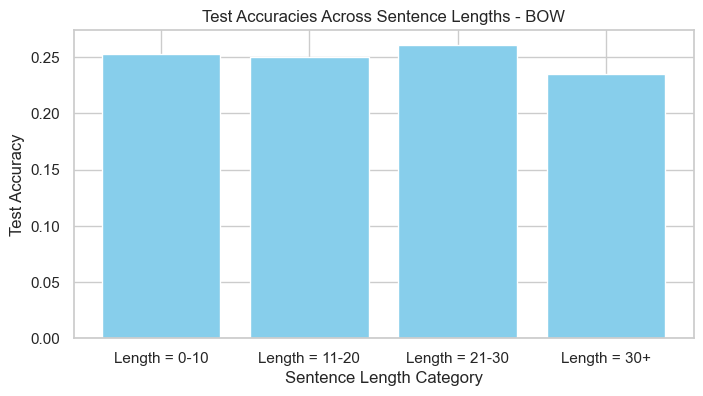

CBOW accuracy across sentence lengths: [0.36898148 0.35       0.33866667 0.30990991]


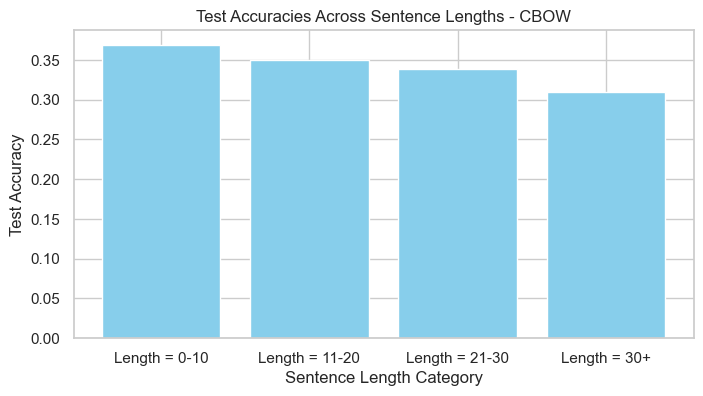

DeepCBOW accuracy across sentence lengths: [0.38935185 0.37193396 0.36474074 0.34144144]


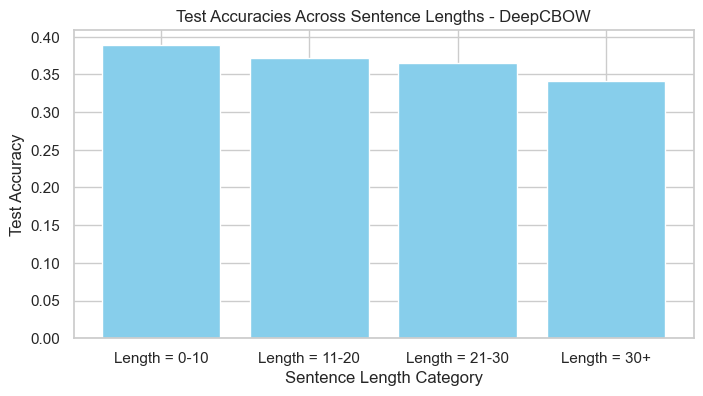

PTDeepCBOW_GloVe accuracy across sentence lengths: [0.47037037 0.44599057 0.40296296 0.40810811]


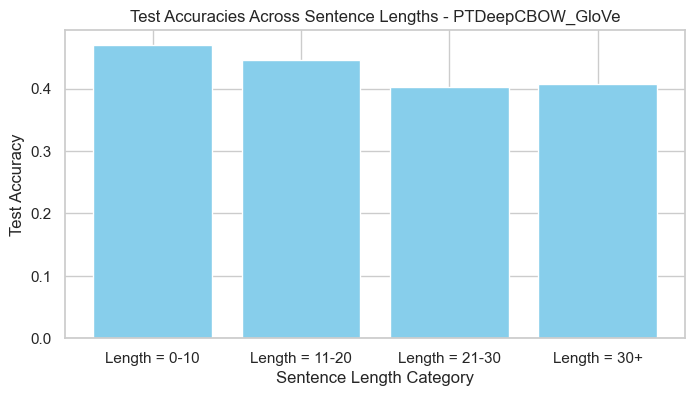

PTDeepCBOW_word2vec accuracy across sentence lengths: [0.45092593 0.44033019 0.39022222 0.3963964 ]


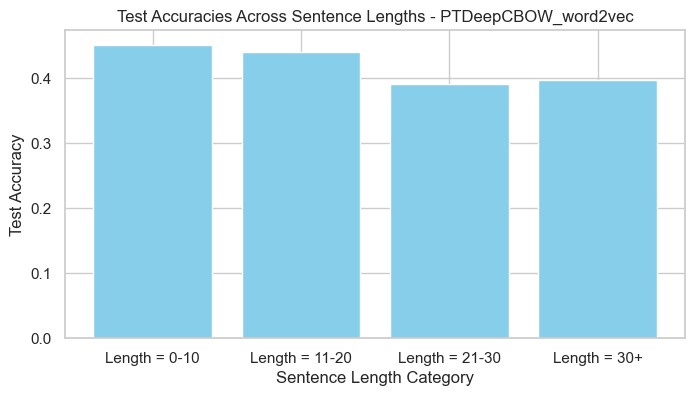

PTDeepCBOW_W2V_F accuracy across sentence lengths: [0.4787037  0.45613208 0.41096296 0.39369369]


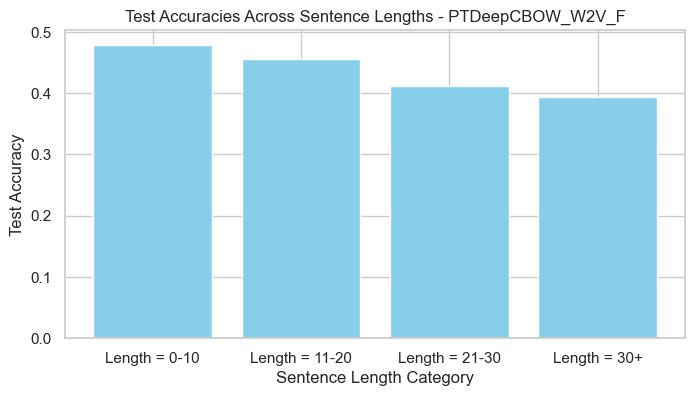

PTDeepCBOW_Glo_F accuracy across sentence lengths: [0.47685185 0.45424528 0.42785185 0.4       ]


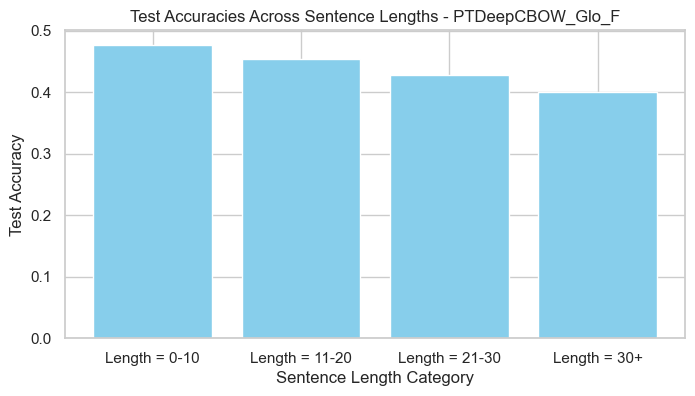

In [119]:
splits = {
    'BOW': np.array([0.25277778, 0.25023585, 0.26103704, 0.23513514]),
    'CBOW': np.array([0.36898148, 0.35, 0.33866667, 0.30990991]),
    'DeepCBOW': np.array([0.38935185, 0.37193396, 0.36474074, 0.34144144]),
    'PTDeepCBOW_GloVe': np.array([0.47037037, 0.44599057, 0.40296296, 0.40810811]),
    'PTDeepCBOW_word2vec': np.array([0.45092593, 0.44033019, 0.39022222, 0.3963964]),
    'PTDeepCBOW_W2V_F': np.array([0.4787037, 0.45613208, 0.41096296, 0.39369369]),
    'PTDeepCBOW_Glo_F': np.array([0.47685185, 0.45424528, 0.42785185, 0.4])
}

length_categories = ['Length = 0-10', 'Length = 11-20', 'Length = 21-30', 'Length = 30+']

# Creating a separate bar plot for each model
for model, accuracies in splits.items():
    plt.figure(figsize=(8, 4))
    plt.bar(length_categories, accuracies, color='skyblue')
    print(f"{model} accuracy across sentence lengths:", accuracies)
    plt.xlabel('Sentence Length Category')
    plt.ylabel('Test Accuracy')
    plt.title(f'Test Accuracies Across Sentence Lengths - {model}')
    plt.savefig(f'./plots/{model}_TestAcc_across_sentenceLen4.png')
    plt.show()

BOW accuracy across sentence lengths: [0.25277778 0.25023585 0.26103704 0.23513514]


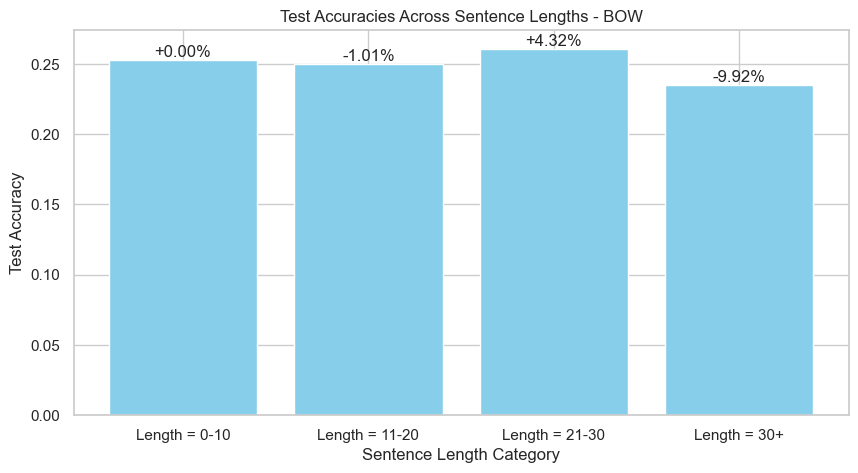

CBOW accuracy across sentence lengths: [0.36898148 0.35       0.33866667 0.30990991]


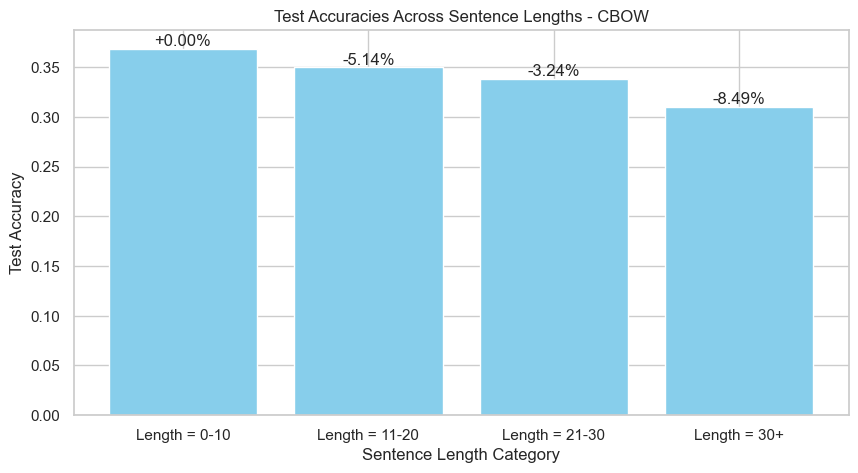

DeepCBOW accuracy across sentence lengths: [0.38935185 0.37193396 0.36474074 0.34144144]


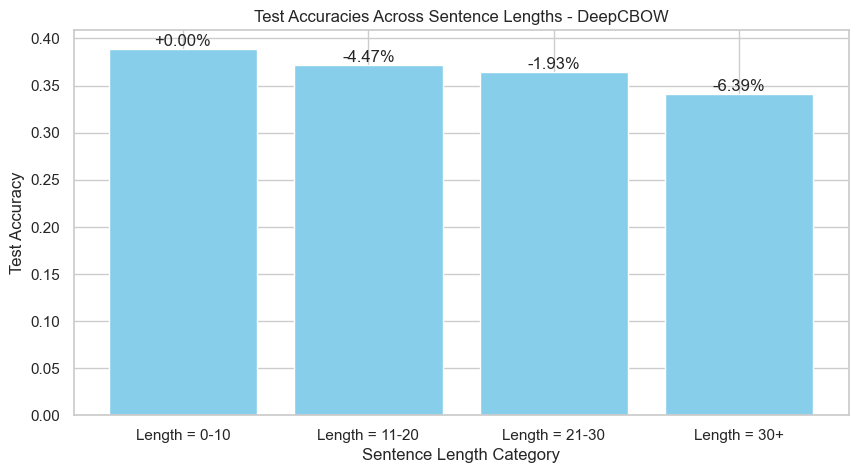

PTDeepCBOW_GloVe accuracy across sentence lengths: [0.47037037 0.44599057 0.40296296 0.40810811]


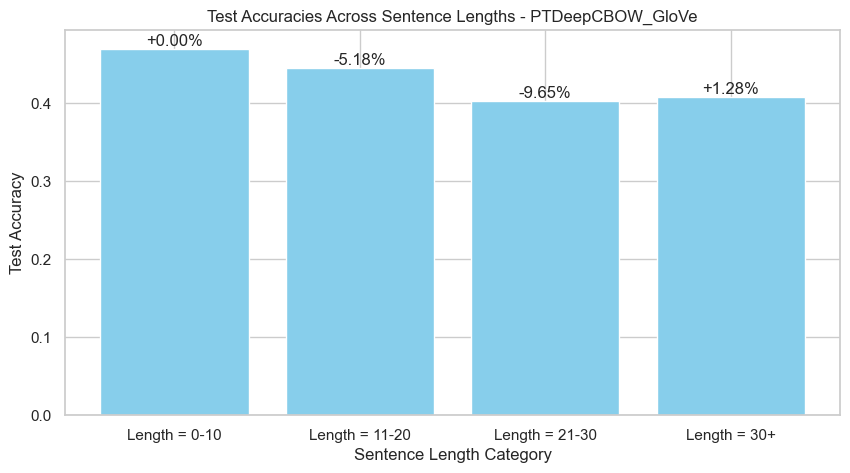

PTDeepCBOW_word2vec accuracy across sentence lengths: [0.45092593 0.44033019 0.39022222 0.3963964 ]


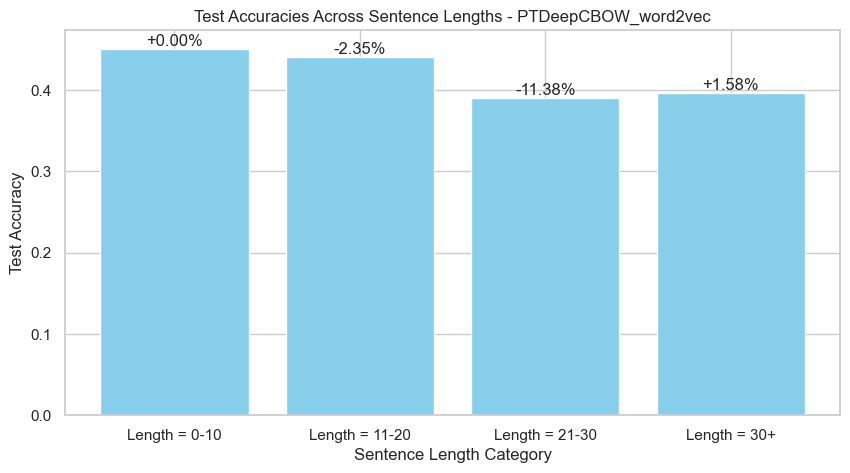

PTDeepCBOW_W2V_F accuracy across sentence lengths: [0.4787037  0.45613208 0.41096296 0.39369369]


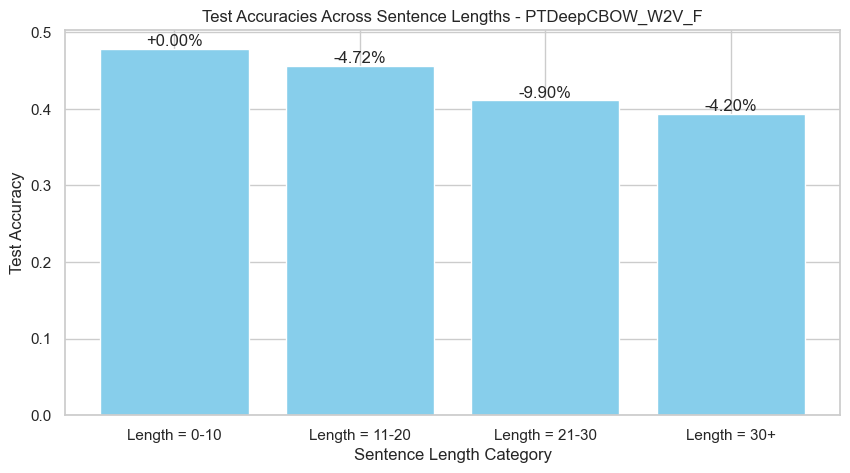

PTDeepCBOW_Glo_F accuracy across sentence lengths: [0.47685185 0.45424528 0.42785185 0.4       ]


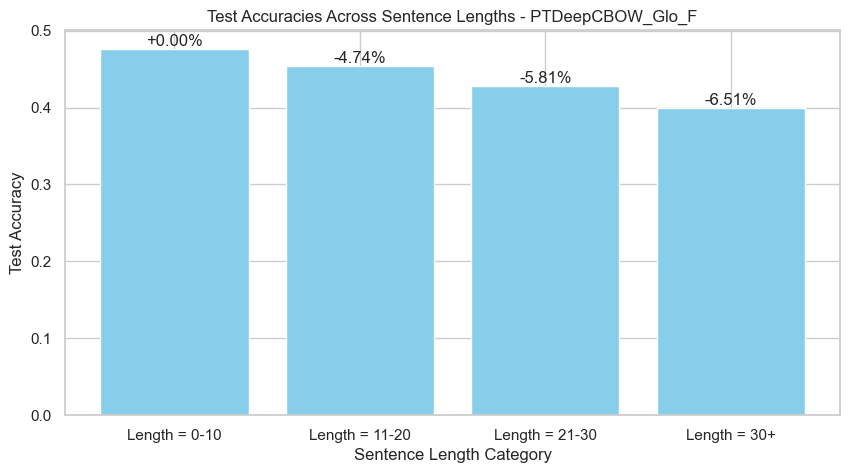

In [121]:
import matplotlib.pyplot as plt
import numpy as np

splits = {
    'BOW': np.array([0.25277778, 0.25023585, 0.26103704, 0.23513514]),
    'CBOW': np.array([0.36898148, 0.35, 0.33866667, 0.30990991]),
    'DeepCBOW': np.array([0.38935185, 0.37193396, 0.36474074, 0.34144144]),
    'PTDeepCBOW_GloVe': np.array([0.47037037, 0.44599057, 0.40296296, 0.40810811]),
    'PTDeepCBOW_word2vec': np.array([0.45092593, 0.44033019, 0.39022222, 0.3963964]),
    'PTDeepCBOW_W2V_F': np.array([0.4787037, 0.45613208, 0.41096296, 0.39369369]),
    'PTDeepCBOW_Glo_F': np.array([0.47685185, 0.45424528, 0.42785185, 0.4])
}

length_categories = ['Length = 0-10', 'Length = 11-20', 'Length = 21-30', 'Length = 30+']
colors = ['skyblue' for _ in range(len(splits))]

# Function to calculate percentage change
def calculate_percentage_change(values):
    changes = [0]  # No change for the first category
    for i in range(1, len(values)):
        change = ((values[i] - values[i - 1]) / values[i - 1]) * 100
        changes.append(change)
    return changes

# Creating a separate bar plot for each model
for (model, accuracies), color in zip(splits.items(), colors):
    changes = calculate_percentage_change(accuracies)

    plt.figure(figsize=(10, 5))
    bars = plt.bar(length_categories, accuracies, color=color)
    print(f"{model} accuracy across sentence lengths:", accuracies)


    # Annotating the percentage changes on the bars
    for bar, change in zip(bars, changes):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{change:+.2f}%', 
                 ha='center', va='bottom')

    plt.xlabel('Sentence Length Category')
    plt.ylabel('Test Accuracy')
    plt.title(f'Test Accuracies Across Sentence Lengths - {model}')
    plt.savefig(f'./plots/{model}_TestAcc_across_sentenceLen4.png')
    plt.show()


LSTM_GloVe accuracy across sentence lengths: [0.51342593, 0.47617925, 0.42044444, 0.42702703]


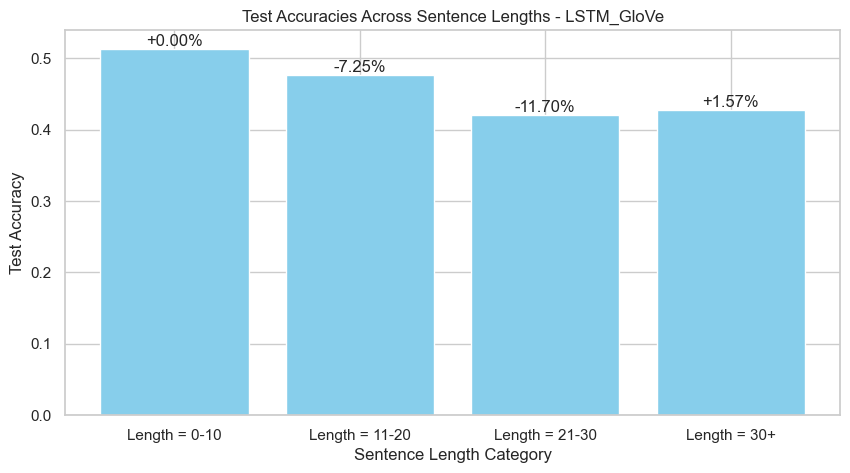

TreeLSTM_GloVe accuracy across sentence lengths: [0.5087963, 0.48136792, 0.45303704, 0.46396396]


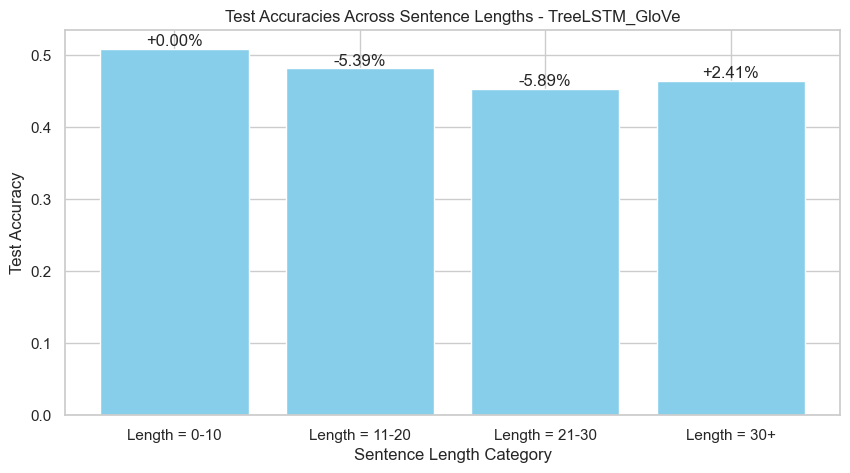

LSTM_word2vec accuracy across sentence lengths: [0.44861111, 0.46603774, 0.41451852, 0.43333333]


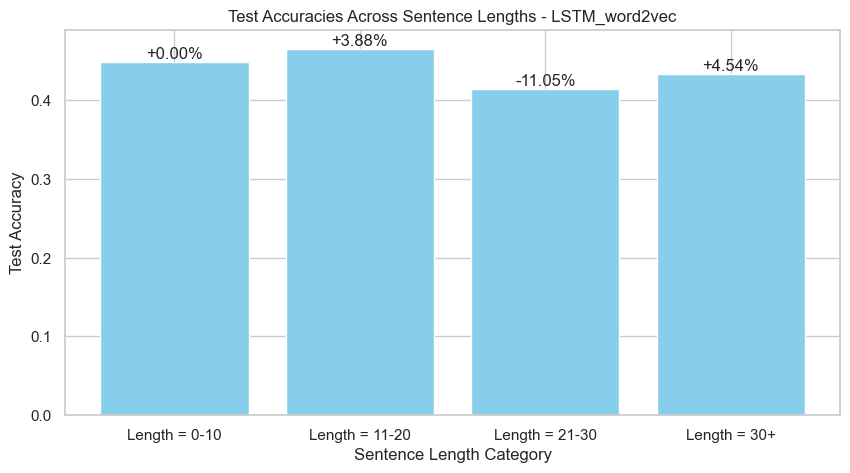

TreeLSTM_word2vec accuracy across sentence lengths: [0.47546296, 0.48160377, 0.43466667, 0.43693694]


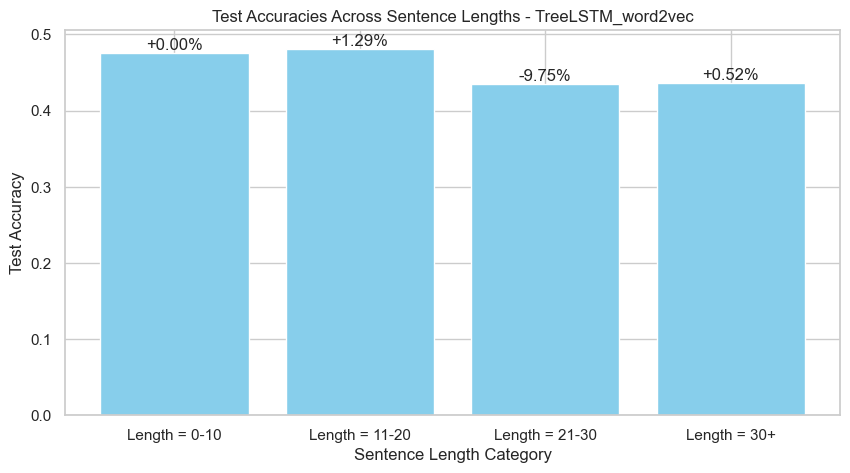

ChildSum_GloVe accuracy across sentence lengths: [0.49537037, 0.47830189, 0.43940741, 0.45405405]


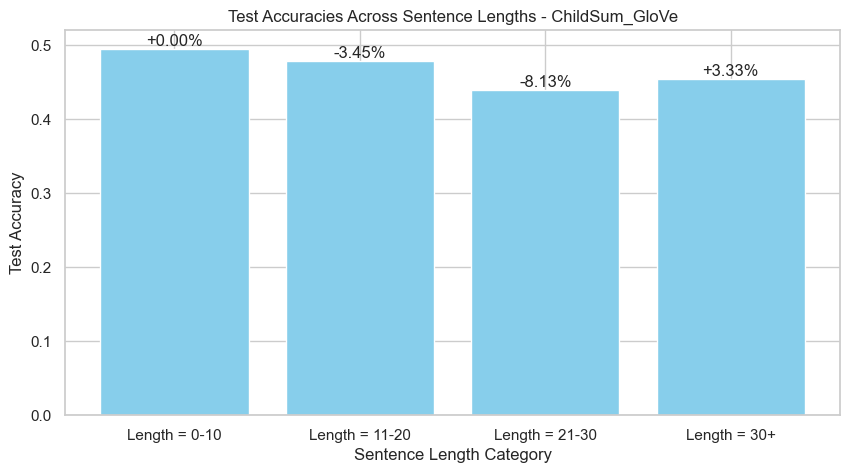

ChildSum_word2vec accuracy across sentence lengths: [0.44907407, 0.46745283, 0.3997037, 0.42612613]


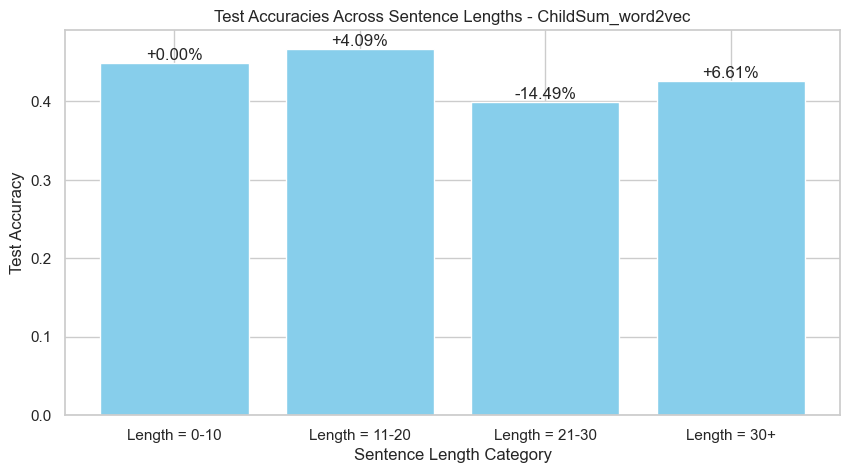

In [122]:
import matplotlib.pyplot as plt
import numpy as np

splits = {'LSTM_GloVe': ([0.51342593, 0.47617925, 0.42044444, 0.42702703]),
 'TreeLSTM_GloVe': ([0.5087963 , 0.48136792, 0.45303704, 0.46396396]),
 'LSTM_word2vec': ([0.44861111, 0.46603774, 0.41451852, 0.43333333]),
 'TreeLSTM_word2vec': ([0.47546296, 0.48160377, 0.43466667, 0.43693694]),
 'ChildSum_GloVe': ([0.49537037, 0.47830189, 0.43940741, 0.45405405]),
 'ChildSum_word2vec': ([0.44907407, 0.46745283, 0.3997037 , 0.42612613])}

length_categories = ['Length = 0-10', 'Length = 11-20', 'Length = 21-30', 'Length = 30+']
colors = ['skyblue' for _ in range(len(splits))]

# Function to calculate percentage change
def calculate_percentage_change(values):
    changes = [0]  # No change for the first category
    for i in range(1, len(values)):
        change = ((values[i] - values[i - 1]) / values[i - 1]) * 100
        changes.append(change)
    return changes

# Creating a separate bar plot for each model
for (model, accuracies), color in zip(splits.items(), colors):
    changes = calculate_percentage_change(accuracies)
    print(f"{model} accuracy across sentence lengths:", accuracies)


    plt.figure(figsize=(10, 5))
    bars = plt.bar(length_categories, accuracies, color=color)

    # Annotating the percentage changes on the bars
    for bar, change in zip(bars, changes):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{change:+.2f}%', 
                 ha='center', va='bottom')

    plt.xlabel('Sentence Length Category')
    plt.ylabel('Test Accuracy')
    plt.title(f'Test Accuracies Across Sentence Lengths - {model}')
    plt.savefig(f'./plots/{model}_TestAcc_across_sentenceLen4.png')
    plt.show()


In [104]:
short_long_means

{'BOW': array([0.24273205, 0.25973154]),
 'CBOW': array([0.37830018, 0.36086957]),
 'DeepCBOW': array([0.37830018, 0.36086957]),
 'PTDeepCBOW_GloVe': array([0.45443038, 0.41195652]),
 'PTDeepCBOW_word2vec': array([0.44273205, 0.41208054]),
 'PTDeepCBOW_W2V_F': array([0.44833625, 0.42248322]),
 'PTDeepCBOW_Glo_F': array([0.45534151, 0.42483221])}

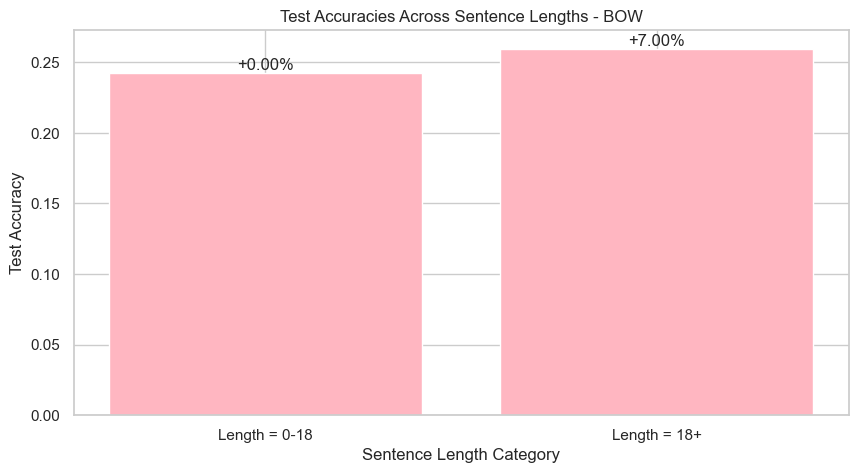

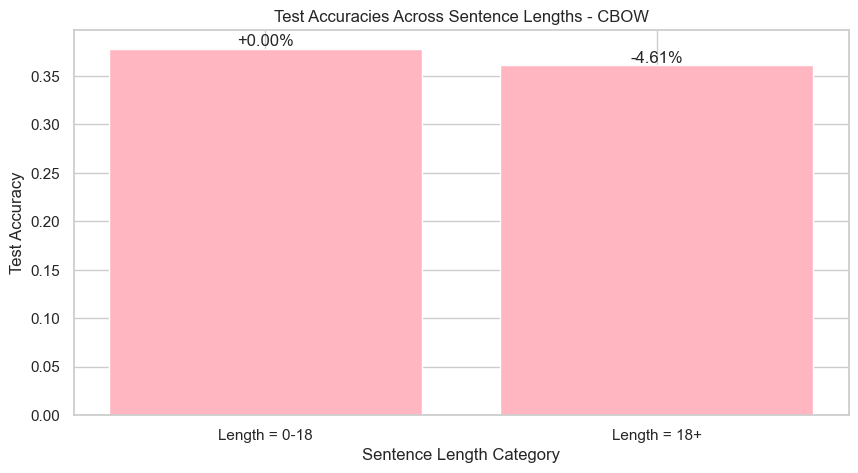

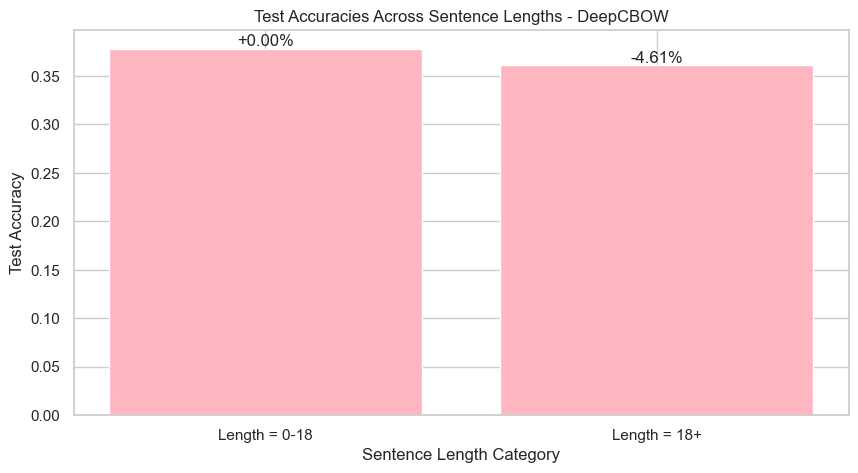

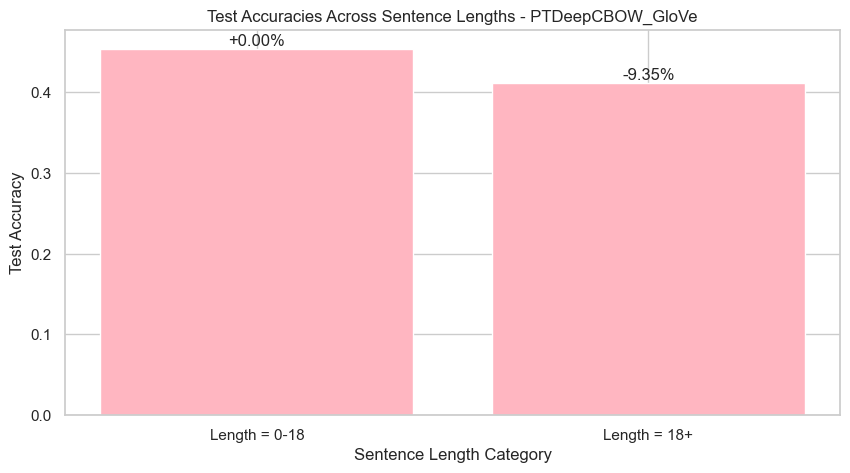

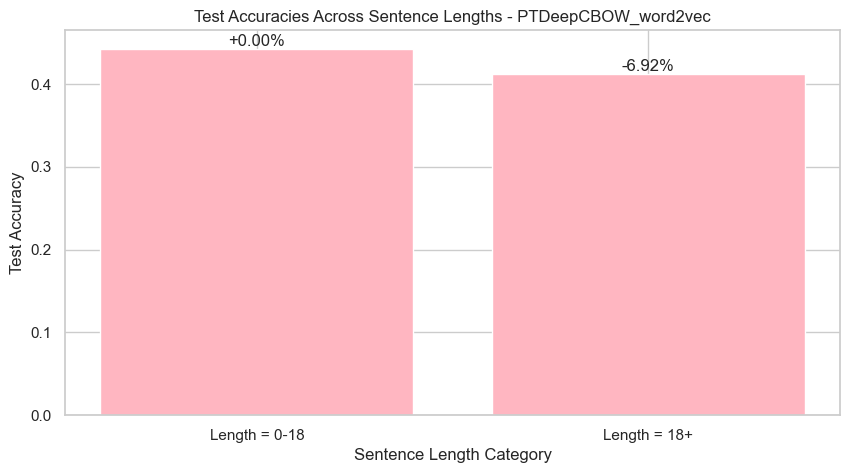

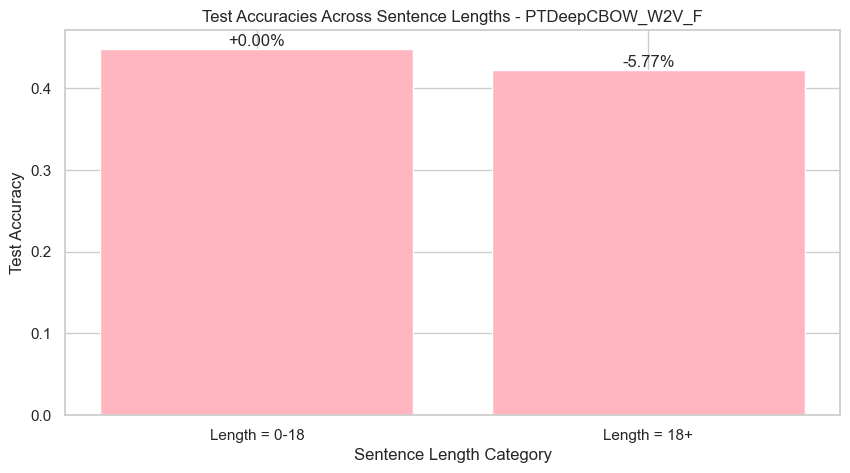

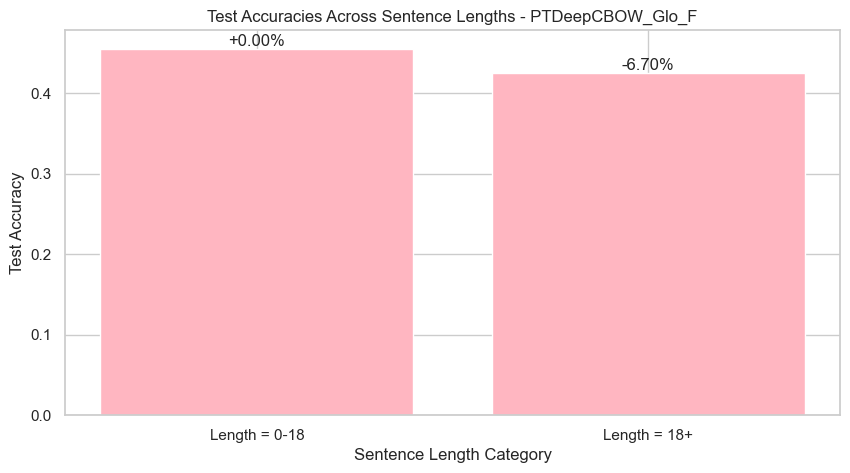

In [115]:
import matplotlib.pyplot as plt
import numpy as np

splits = short_long_means

length_categories = ['Length = 0-18', 'Length = 18+']
# Soft pink hue --> 
colors = [ '#FFB6C1' for _ in range(len(splits))]

# Function to calculate percentage change
def calculate_percentage_change(values):
    changes = [0]  # No change for the first category
    for i in range(1, len(values)):
        change = ((values[i] - values[i - 1]) / values[i - 1]) * 100
        changes.append(change)
    return changes

# Creating a separate bar plot for each model
for (model, accuracies), color in zip(splits.items(), colors):
    changes = calculate_percentage_change(accuracies)

    plt.figure(figsize=(10, 5))
    bars = plt.bar(length_categories, accuracies, color=color)

    # Annotating the percentage changes on the bars
    for bar, change in zip(bars, changes):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{change:+.2f}%', 
                 ha='center', va='bottom')

    plt.xlabel('Sentence Length Category')
    plt.ylabel('Test Accuracy')
    plt.title(f'Test Accuracies Across Sentence Lengths - {model}')
    plt.savefig(f'./plots/{model}_TestAcc_across_sentenceLen2.png')
    plt.show()


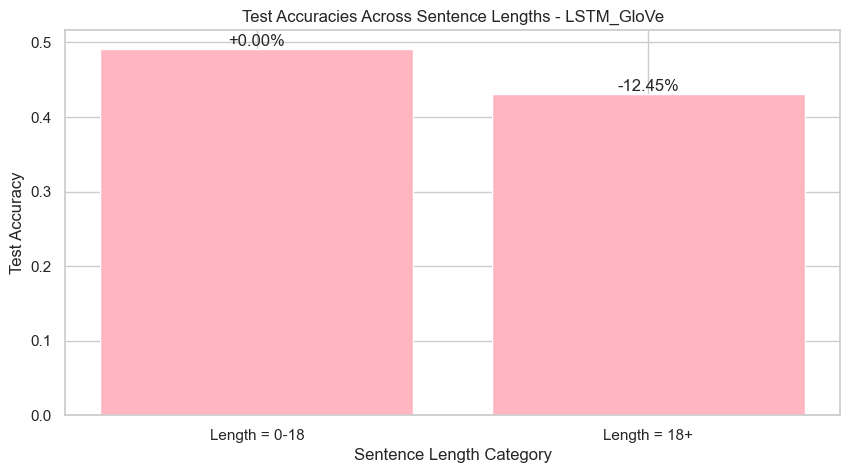

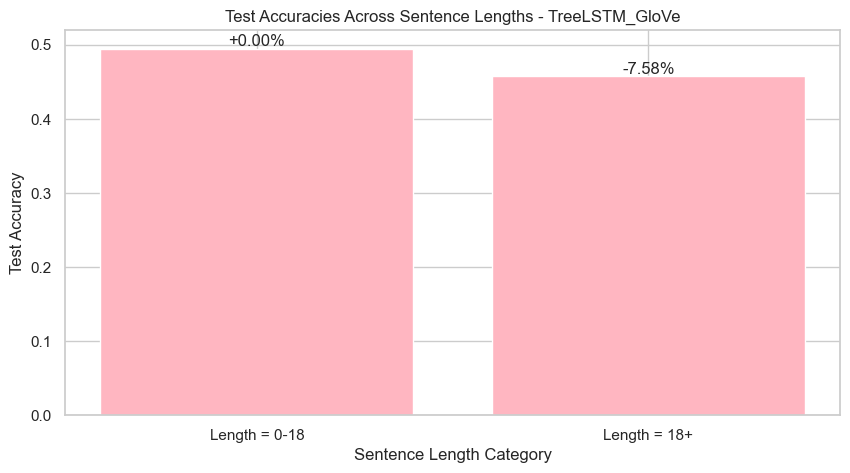

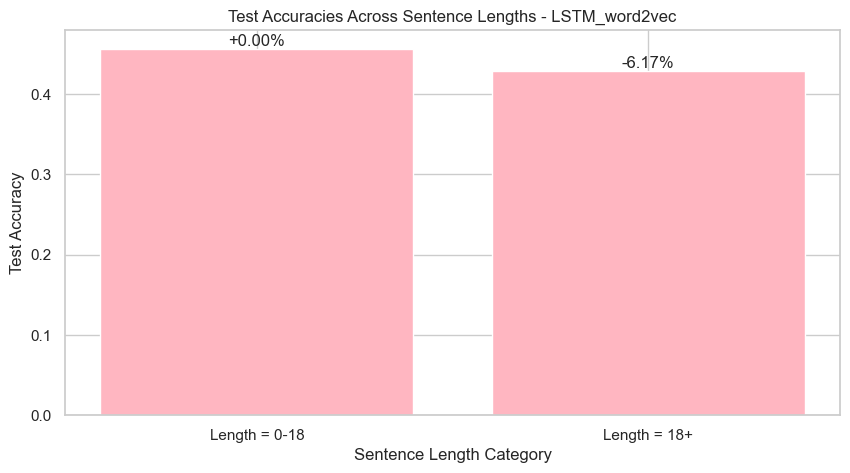

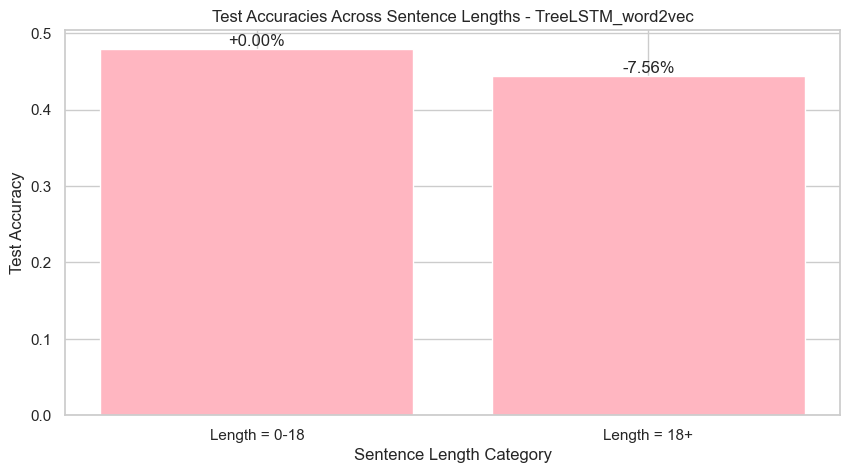

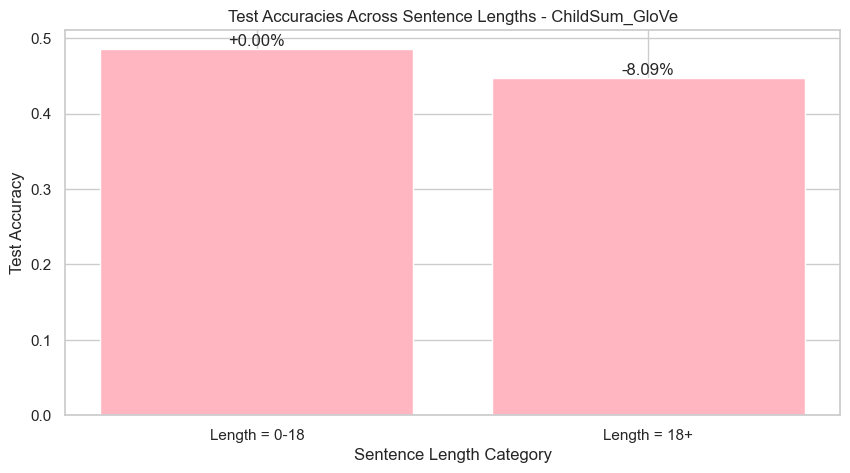

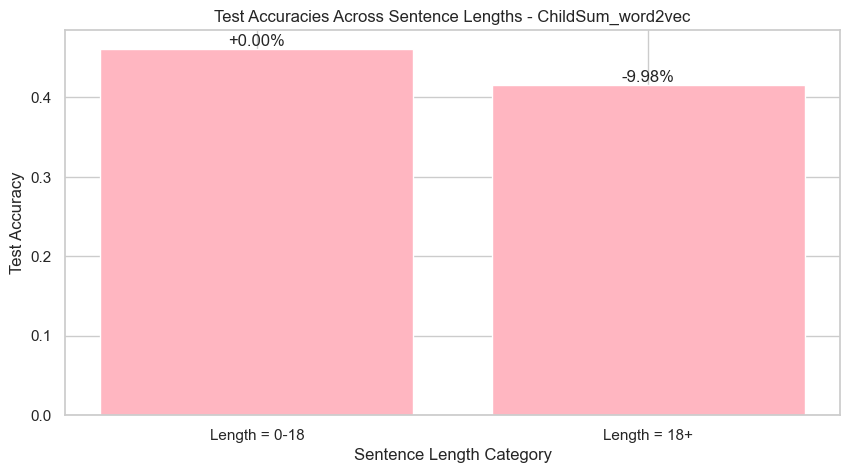

In [116]:
import matplotlib.pyplot as plt
import numpy as np

splits = lstm_short_long_means

length_categories = ['Length = 0-18', 'Length = 18+']
colors = [ '#FFB6C1' for _ in range(len(splits))]

# Function to calculate percentage change
def calculate_percentage_change(values):
    changes = [0]  # No change for the first category
    for i in range(1, len(values)):
        change = ((values[i] - values[i - 1]) / values[i - 1]) * 100
        changes.append(change)
    return changes

# Creating a separate bar plot for each model
for (model, accuracies), color in zip(splits.items(), colors):
    changes = calculate_percentage_change(accuracies)

    plt.figure(figsize=(10, 5))
    bars = plt.bar(length_categories, accuracies, color=color)

    # Annotating the percentage changes on the bars
    for bar, change in zip(bars, changes):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{change:+.2f}%', 
                 ha='center', va='bottom')

    plt.xlabel('Sentence Length Category')
    plt.ylabel('Test Accuracy')
    plt.title(f'Test Accuracies Across Sentence Lengths - {model}')
    plt.savefig(f'./plots/{model}_TestAcc_across_sentenceLen4.png')
    plt.show()
